# Simulação de Monte Carlo

Permite fazer uma hipótese variando um número grande de vezes diversas variáveis.
Isso nos mostra os valores máximo, mínimo e médio dos quais a variável pode alcançar.

Para variar, da pra se usar dados históricos e volatilidade histórica das variáveis.

## Simulando o Lucro Bruto de uma empresa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

C:\Users\lucaa\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
receita_media = 170
receita_std = 20
interacoes = 10000

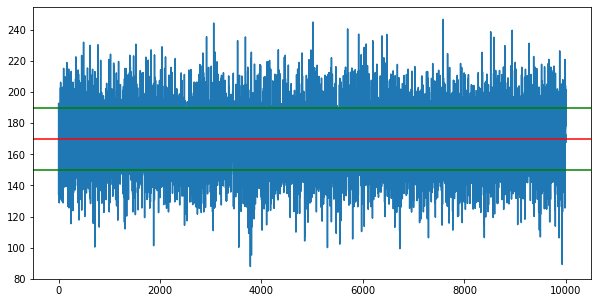

In [3]:
receita = np.random.normal(receita_media,receita_std,interacoes)

plt.figure(figsize=(10,5))
plt.plot(receita)
plt.axhline(receita_media,color='red')
plt.axhline(receita_std+receita_media,color='green')
plt.axhline(receita_media-receita_std,color='green')
plt.show()

#plt.hist(receita)
#plt.axvline(receita_media, color='red')
#plt.show()

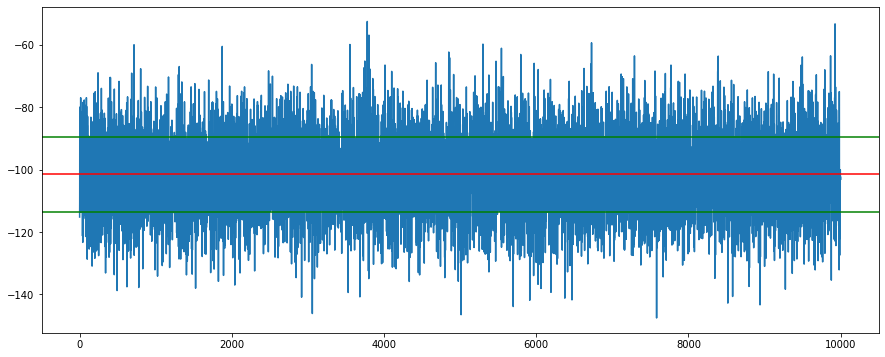

In [4]:
# cogs é na media 60% das receitas, e o std é 10%

cogs_media_input = 0.6
cogs_std_input = 0.1

cogs = - (receita * np.random.normal(cogs_media_input,cogs_std_input))
cogs_media = cogs.mean()
cogs_std = cogs.std()

plt.figure(figsize=(15,6))
plt.plot(cogs)
plt.axhline(cogs_media, color='red')
plt.axhline(cogs_media+cogs_std,color='green')
plt.axhline(cogs_media-cogs_std,color='green')
plt.show()

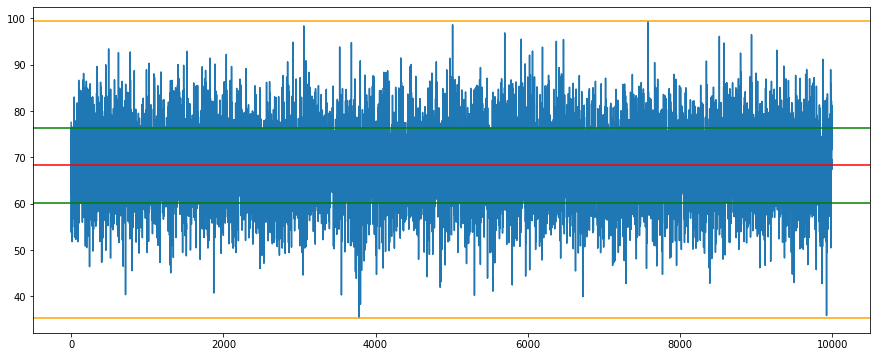

In [5]:
lucro_bruto = receita + cogs

lucro_bruto_media = lucro_bruto.mean()
lucro_bruto_std = lucro_bruto.std()
lucro_bruto_max = max(lucro_bruto)
lucro_bruto_min = min(lucro_bruto)

plt.figure(figsize=(15,6))
plt.plot(lucro_bruto)
plt.axhline(lucro_bruto_media, color='red')
plt.axhline(lucro_bruto_media+lucro_bruto_std,color='green')
plt.axhline(lucro_bruto_media-lucro_bruto_std,color='green')
plt.axhline(lucro_bruto_max, color='orange')
plt.axhline(lucro_bruto_min, color='orange')
plt.show()

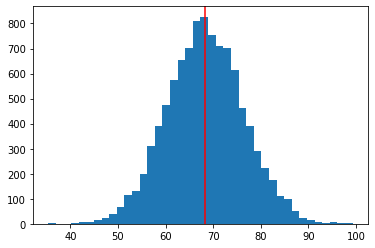

In [6]:
plt.hist(lucro_bruto, bins=40)
plt.axvline(lucro_bruto_media, color='red')
plt.show()

[]

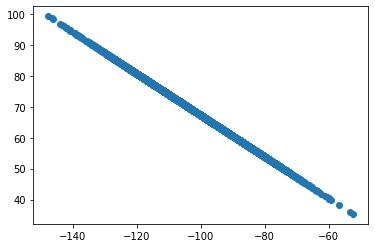

In [7]:
plt.scatter(cogs,lucro_bruto)
plt.plot()

## Prevendo o preço das ações

$$preço_1 = preço_0 * e^r$$

Precisaremos de 2 elementos:
   * Drift = a direção que as taxas de retorno tiveram no passado
$$ Drift_x = média_x - \frac{1}{2} var_x$$
   * Volatilidade = é uma variável aleatória
$$ Random = std_x * z(rand(0;1))$$

$$ preço_1 = preço_0 * e^{média_x - \frac{1}{2} var_x + std_x * z(rand(0;1))}$$

In [8]:
ticker = ['PG']

data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [9]:
# pct_change pega o retorno normal dos dados

log_return = np.log(1+data.pct_change())
log_return.head(4)

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202


In [10]:
log_return_media = log_return.mean()
log_return_var = log_return.var()
log_return_std = log_return.std()

In [11]:
drift = log_return_media - (0.5 * log_return_var)

In [12]:
# retorna o z de acordo com uma porcentagem
norm.ppf(0.95)

1.6448536269514722

In [13]:
z = norm.ppf(np.random.rand(10,2))

In [14]:
dias = 1000

In [15]:
# criação de 10 vezes 1000 retornos aleatorios para as ações
daily_returns = np.exp(drift.values + log_return_std.values*norm.ppf(np.random.rand(dias,interacoes)))

In [16]:
# primeiro preço da ação
s0 = data.iloc[-1]
# cria uma lista com valores zerados
price_list = np.zeros_like(daily_returns)
# primeiro preço da lista vai ser o primeiro preço da ação
price_list[0] = s0

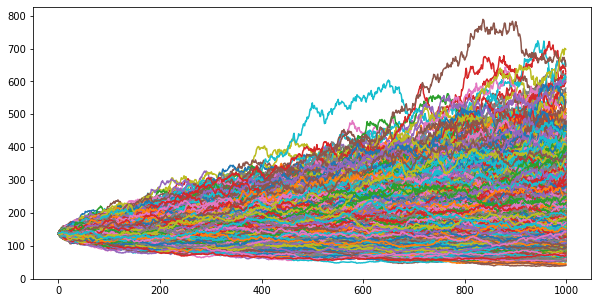

In [17]:
for t in range(1, dias):
    price_list[t] = price_list[t-1]*daily_returns[t]

plt.figure(figsize=(10,5))
plt.plot(price_list)
plt.show()